In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("imputed_final_deleted.csv")
df.shape

(6835, 31)

In [3]:
y = df['class']
X = df[df.columns[df.columns != 'class']]

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit_transform(X)
X= scaler.fit_transform(X)

col = list(df)
col.remove('class')

X = pd.DataFrame(X)
X.columns = col

In [5]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state = 5).fit_sample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled == 0)))

After OverSampling, the shape of train_X: (12948, 30)
After OverSampling, the shape of train_y: (12948, 30) 

After OverSampling, counts of label '1': 6474
After OverSampling, counts of label '0': 6474


In [6]:
X_up = X_resampled
y_up = pd.DataFrame(y_resampled)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size = 0.2, random_state = 5)

# SVM

In [8]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

def plot_coefficients(classifier, feature_names, top_features = 5):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(abs(coef))[-top_features:]
    
    plt.bar(np.arange(top_features), abs(coef[top_positive_coefficients]))
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1 + top_features), feature_names[top_positive_coefficients], rotation = 60, ha = 'right')
    plt.show()
    
    print('가장 많이 반영된 변수: ', feature_names[top_positive_coefficients][::-1])
    print('반영된 정도: ', coef[top_positive_coefficients][::-1])

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 5)

def f1_score(model):
    scores = cross_val_score(model, X_train, y_train, scoring = 'f1', cv = cv, n_jobs = -1)
    print('F1 Score: ', mean(scores))

## SVC1; svm.LinearSVC

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid1 = {'C': [0.1, 1, 10, 100]}

In [12]:
grid1 = GridSearchCV(LinearSVC(), param_grid1, cv = 3, verbose = 2)
grid1.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=1 .............................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............................................. C=1, total=   0.2s
[CV] C=10 ............................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=10, total=   2.0s
[CV] C=10 ............................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=10, total=   1.9s
[CV] C=10 ............................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................. C=10, total=   2.0s
[CV] C=100 ...........................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................ C=100, total=   2.0s
[CV] C=100 ...........................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................ C=100, total=   2.3s
[CV] C=100 ...........................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................................ C=100, total=   2.4s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   14.3s finished
C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=2)

C:\Users\sec\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


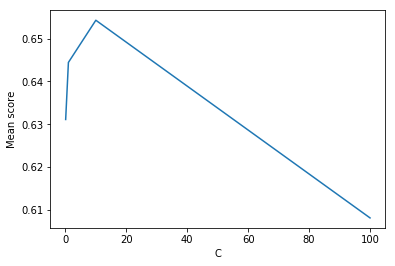

In [13]:
Cs1 = np.array([0.1, 1, 10, 100])
scores1 = [x[1] for x in grid1.grid_scores_]
scores1 = np.array(scores1).reshape(len(Cs1), )

plt.plot(Cs1, scores1)
plt.xlabel('C')
plt.ylabel('Mean score')
plt.show()

In [14]:
grid1.best_params_

{'C': 10}

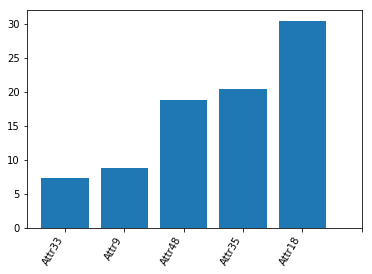

가장 많이 반영된 변수:  ['Attr18' 'Attr35' 'Attr48' 'Attr9' 'Attr33']
반영된 정도:  [-30.46331978 -20.43847244  18.75603052  -8.80337759  -7.30136743]


In [16]:
svc1 = LinearSVC(C = 10)
svc1.fit(X_train, y_train)
plot_coefficients(svc1, df.columns.values)

In [17]:
f1_score(svc1)

F1 Score:  0.6250013436460439


## SVC2; svm.SVC(kernel = 'linear')

In [18]:
param_grid2 = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

In [19]:
grid2 = GridSearchCV(SVC(), param_grid2, cv = 3, verbose = 2)
grid2.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=0.1, gamma=1, total=   8.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.3s remaining:    0.0s
C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=0.1, gamma=1, total=   8.0s
[CV] C=0.1, gamma=1 ..................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=0.1, gamma=1, total=   8.6s
[CV] C=0.1, gamma=0.1 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=0.1, gamma=0.1, total=   9.0s
[CV] C=0.1, gamma=0.1 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=0.1, gamma=0.1, total=   8.4s
[CV] C=0.1, gamma=0.1 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=0.1, gamma=0.1, total=   8.8s
[CV] C=0.1, gamma=0.01 ...............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=0.1, gamma=0.01, total=   8.5s
[CV] C=0.1, gamma=0.01 ...............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=0.1, gamma=0.01, total=   9.1s
[CV] C=0.1, gamma=0.01 ...............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=0.1, gamma=0.01, total=   9.3s
[CV] C=0.1, gamma=0.001 ..............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, gamma=0.001, total=   8.9s
[CV] C=0.1, gamma=0.001 ..............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, gamma=0.001, total=   8.9s
[CV] C=0.1, gamma=0.001 ..............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, gamma=0.001, total=   9.0s
[CV] C=1, gamma=1 ....................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................................... C=1, gamma=1, total=   7.8s
[CV] C=1, gamma=1 ....................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................................... C=1, gamma=1, total=   7.7s
[CV] C=1, gamma=1 ....................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................................... C=1, gamma=1, total=   8.1s
[CV] C=1, gamma=0.1 ..................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=1, gamma=0.1, total=   8.0s
[CV] C=1, gamma=0.1 ..................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=1, gamma=0.1, total=   7.6s
[CV] C=1, gamma=0.1 ..................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=1, gamma=0.1, total=   6.1s
[CV] C=1, gamma=0.01 .................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=1, gamma=0.01, total=   6.5s
[CV] C=1, gamma=0.01 .................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=1, gamma=0.01, total=   6.9s
[CV] C=1, gamma=0.01 .................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=1, gamma=0.01, total=   8.8s
[CV] C=1, gamma=0.001 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=1, gamma=0.001, total=   8.8s
[CV] C=1, gamma=0.001 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=1, gamma=0.001, total=   8.6s
[CV] C=1, gamma=0.001 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=1, gamma=0.001, total=   8.6s
[CV] C=10, gamma=1 ...................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... C=10, gamma=1, total=   7.0s
[CV] C=10, gamma=1 ...................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... C=10, gamma=1, total=   7.2s
[CV] C=10, gamma=1 ...................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................... C=10, gamma=1, total=   7.3s
[CV] C=10, gamma=0.1 .................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=10, gamma=0.1, total=   7.6s
[CV] C=10, gamma=0.1 .................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=10, gamma=0.1, total=   7.8s
[CV] C=10, gamma=0.1 .................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................................. C=10, gamma=0.1, total=   7.8s
[CV] C=10, gamma=0.01 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=10, gamma=0.01, total=   8.3s
[CV] C=10, gamma=0.01 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=10, gamma=0.01, total=   8.3s
[CV] C=10, gamma=0.01 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=10, gamma=0.01, total=   8.4s
[CV] C=10, gamma=0.001 ...............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=10, gamma=0.001, total=   8.8s
[CV] C=10, gamma=0.001 ...............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=10, gamma=0.001, total=   8.6s
[CV] C=10, gamma=0.001 ...............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=10, gamma=0.001, total=   8.7s
[CV] C=100, gamma=1 ..................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=100, gamma=1, total=   7.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   6.8s
[CV] C=100, gamma=1 ..................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................... C=100, gamma=1, total=   6.9s
[CV] C=100, gamma=0.1 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=100, gamma=0.1, total=   7.3s
[CV] C=100, gamma=0.1 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=100, gamma=0.1, total=   7.5s
[CV] C=100, gamma=0.1 ................................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................. C=100, gamma=0.1, total=   7.4s
[CV] C=100, gamma=0.01 ...............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=100, gamma=0.01, total=   7.8s
[CV] C=100, gamma=0.01 ...............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=100, gamma=0.01, total=   8.2s
[CV] C=100, gamma=0.01 ...............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................................ C=100, gamma=0.01, total=   8.0s
[CV] C=100, gamma=0.001 ..............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=100, gamma=0.001, total=   8.2s
[CV] C=100, gamma=0.001 ..............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=100, gamma=0.001, total=   8.3s
[CV] C=100, gamma=0.001 ..............................................


C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=100, gamma=0.001, total=   8.4s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  9.8min finished
C:\Users\sec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

C:\Users\sec\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


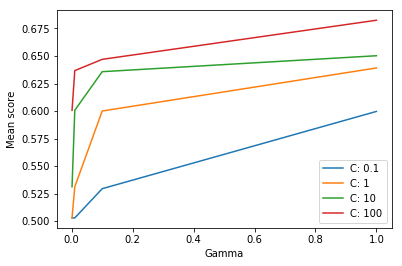

In [20]:
Cs2 = [0.1, 1, 10, 100]
Gammas2 = [1, 0.1, 0.01, 0.001]

scores2 = [x[1] for x in grid2.grid_scores_]
scores2 = np.array(scores2).reshape(len(Cs2), len(Gammas2))

for ind, i in enumerate(Cs2):
    plt.plot(Gammas2, scores2[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

In [21]:
grid2.best_params_

{'C': 100, 'gamma': 1}

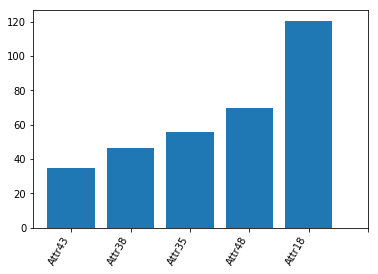

가장 많이 반영된 변수:  ['Attr18' 'Attr48' 'Attr35' 'Attr38' 'Attr43']
반영된 정도:  [-120.65116953   69.69286122  -55.55262903  -46.49689941  -34.83484514]


In [22]:
svc2 = SVC(kernel = 'linear', C = 100, gamma = 1)
svc2.fit(X_train, y_train)
plot_coefficients(svc2, df.columns.values)

In [23]:
f1_score(svc2)

F1 Score:  0.6212065565163134


In [26]:
import pickle
pickle.dump(grid1, open('svm1.pkl', 'wb'))
pickle.dump(grid2, open('svm2.pkl', 'wb'))